In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
# from google.colab import files
# from google.colab.patches import cv2_imshow


In [3]:
#uploaded = files.upload()
#ogim = cv2.imread(list(uploaded.keys())[0])
ogim = cv2.imread('C:\\Users\\juani\\OneDrive\\Documentos\\maze.jpg')
grayIm = cv2.cvtColor(ogim, cv2.COLOR_BGR2GRAY)

In [4]:
#cv2.imshow(ogim)
#im = Image.open('C:\\Users\\juani\\OneDrive\\Documentos\\GitHub\\occupancy-grid-a-star\\examples\\maps\\example_map_binary.png')
im = Image.open('C:\\Users\\juani\\OneDrive\\Documentos\\maze.jpg')
print(grayIm)
print(grayIm.shape)
print(type(grayIm))
im.show()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(200, 200)
<class 'numpy.ndarray'>


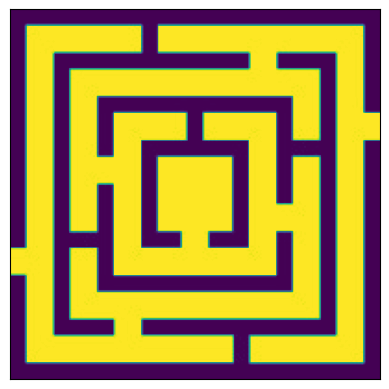

In [5]:
plt.imshow(grayIm)
plt.tick_params(
    bottom=False,
    left=False,
    labelleft=False,
    labelbottom=False)

In [6]:
map = grayIm//255
map = np.uint8(map)
# for i, row in enumerate(map):
#   for j, val in enumerate(row):
#     if val == 1:
#       map[i][j] = 0
#     else:
#       map[i][j] = 1
print(type(map[0][0]))
print(map)

<class 'numpy.uint8'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [7]:
from pathfinding.core.diagonal_movement import DiagonalMovement
from pathfinding.core.grid import Grid 
from pathfinding.finder.a_star import AStarFinder

In [11]:
matrix = [[1,1,1],
          [0,0,0],
          [0,0,0]]

grid = Grid(matrix=map)

start = grid.node(100, 100)
end = grid.node(100, 180)

finder = AStarFinder(diagonal_movement=DiagonalMovement.never)
path, runs = finder.find_path(start, end, grid)


#print('operations:', runs, 'path length:', len(path))
#print(grid.grid_str(path=path, start=start, end=end))